 This project was created and contributed to by:
 - Dao Ton-Nu, dt26435
 - Darren Au,  da32923
 - Arturo Hernandez, ah53692
 - Jared Pomerantz, jmp6474


Original dataset from: https://data.austintexas.gov/Transportation-and-Mobility/Real-Time-Traffic-Incident-Reports/dx9v-zd7x 


In [ ]:
# Standard Headers
# This project was created and contributed to by Dao Ton-Nu, Darren Au, Arturo Hernandez, and Jared Pomerantz
# Original dataset from: https://data.austintexas.gov/Transportation-and-Mobility/Real-Time-Traffic-Incident-Reports/dx9v-zd7x 
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [ ]:
# Your code here
incidents_df = pd.read_csv("https://raw.githubusercontent.com/DaoTonNu/cs329e-files/main/samp_data.csv") # cleaned and sampled
#incidents_df = incidents_df[:2000]

In [ ]:
print(incidents_df)

# Possible stuff:
'''
-distribution of issue types
-most common serious accident
-location analysis? its all austin though
-most common times for each type of issue, then times for all issues
-day of week with most accidents


'''

                                      Traffic Report ID  \
0     0911D8E4573BE6F3EEDA3F13927DE830F6A16E6D_15544...   
1     77BF3F680D135C03C5A0F017E13016D0A4785BB9_15679...   
2     CF9725A2055B246C88258A875D98584BA37189AF_16232...   
3     CA9E263D07340B8B04EEA95E4172CCB3800E773A_15621...   
4     83DF4360232F4B1CC609EDB0620E15005085786D_15127...   
...                                                 ...   
1995  F7BD9AC6946900FC1D9EF166B78449710E65900C_15181...   
1996  6F39DCFF36D707F13761851DCAD9E76EC53A9318_15712...   
1997  6ADB922FA7A3B56CFCBD0BEF18B3939C46CC213B_15720...   
1998  DD84F0EE24CFD17BA4AC744AFAD8DE1687C2A400_16516...   
1999  06072EB4F0454CBD924930E1FD2F06787E77D416_16204...   

                    Published Date     Issue Reported                Location  \
0     04/05/2019 04:40:10 PM +0000       Crash Urgent  (30.328916,-97.739788)   
1     09/09/2019 12:32:43 AM +0000     Traffic Hazard  (30.236542,-97.720985)   
2     06/09/2021 04:45:24 PM +0000  TRFC HAZD/ D

'\n-distribution of issue types\n-most common serious accident\n-location analysis? its all austin though\n-most common times for each type of issue, then times for all issues\n-day of week with most accidents\n\n\n'

Traffic Hazard                589
Crash Urgent                  514
Crash Service                 261
COLLISION                     201
TRFC HAZD/ DEBRIS             142
zSTALLED VEHICLE               64
LOOSE LIVESTOCK                53
COLLISION WITH INJURY          50
Traffic Impediment             40
COLLISN/ LVNG SCN              32
Stalled Vehicle                29
COLLISION/PRIVATE PROPERTY      7
BLOCKED DRIV/ HWY               5
VEHICLE FIRE                    5
TRAFFIC FATALITY                4
BOAT ACCIDENT                   2
ICY ROADWAY                     1
AUTO/ PED                       1
Name: Issue Reported, dtype: int64


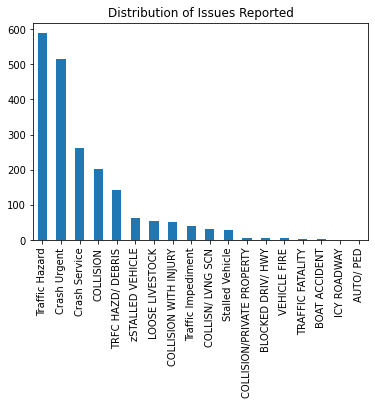

In [ ]:
# Darren
series = incidents_df['Issue Reported'].value_counts()
print((series))
p1 = series.plot(kind='bar', title='Distribution of Issues Reported')

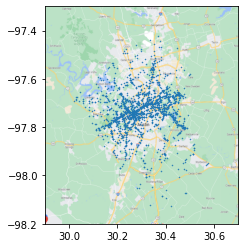

In [ ]:
# Jared (I'm eventually going to try to get a better picture)
latitude = incidents_df['Latitude']
longitude = incidents_df['Longitude']
location = pd.concat([latitude, longitude], axis=1)
res = location.loc[location['Latitude'] > 25]

img = plt.imread('https://raw.githubusercontent.com/pomerantzj622/cs329e-project/main/map.PNG')
fig, ax = plt.subplots()
ax.imshow(img, extent=[29.9, 30.7, -98.2, -97.3])
ax.scatter(res['Latitude'], res['Longitude'], 1, marker='.')

Fri    343
Tue    318
Mon    294
Thu    281
Wed    272
Sat    270
Sun    222
Name: DayofWeek, dtype: int64


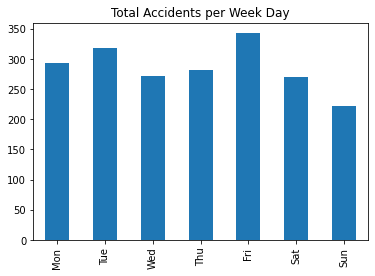

In [ ]:
# Arturo
import datetime

# gets day of the week from data (Mon, ..., Sun)
def get_weekday(x):
    # remove time from entry
    date = x.split(" ")[0]
    
    # get month, day, year
    month, day, year = date.split("/")
    
    # week day number [0, ..., 6]. Monday is day 0
    day_n = datetime.datetime(int(year), int(month), int(day)).weekday()
    
    # return day of the week
    return ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"][day_n]



# get day of the week for each entry
day_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")


# number of accidents per week day
print(day_of_week.value_counts())

order = ['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun']
values = day_of_week.value_counts().loc[order]
plot = values.plot(kind='bar', title='Total Accidents per Week Day')

Mean hour of day: 13.6235


Text(0, 0.5, 'Frequency')

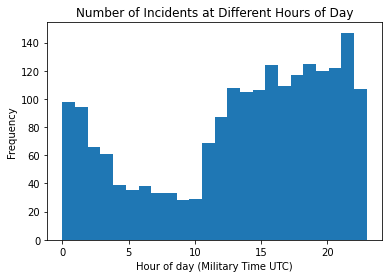

In [ ]:
# Dao
def convert_milit_time(row):
  mtime = row[1]

  rtime_hms = row[1].split(':')

  if row[2] == 'PM':
    if int(rtime_hms[0]) != 12:
      mtime = str( int(rtime_hms[0]) + 12) + ':' + rtime_hms[1] + ':' + rtime_hms[2]
  else: #AM
    if int(rtime_hms[0]) == 12:
      mtime = str('00') + ':' + rtime_hms[1] + ':' + rtime_hms[2]

  return mtime

date_time = incidents_df['Published Date'].str.split()

milit_times = date_time.apply(lambda x: convert_milit_time(x))

milit_hms = pd.DataFrame(milit_times.str.split(':').values.tolist())

milit_hr = milit_hms[0].apply(lambda x: int(x))
milit_hr = pd.Series(milit_hr, name = 'UTC Hour of Day')
print('Mean hour of day:', milit_hr.mean())
plt.hist(milit_hr, 24)
plt.title('Number of Incidents at Different Hours of Day')
plt.xlabel('Hour of day (Military Time UTC)')
plt.ylabel('Frequency')

## Try to predict Weekday or Weekend

In [ ]:
def get_weekday(x):
    # remove time from entry
    date = x.split(" ")[0]
    
    # get month, day, year
    month, day, year = date.split("/")
    
    # week day number [0, ..., 6]. Monday is day 0
    day_n = datetime.datetime(int(year), int(month), int(day)).weekday()
    
    # return day of the week
    return day_n

# get day of the week for each entry
nday_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")

weekday = nday_of_week.apply(lambda x: int(x < 5))

alg_df = pd.concat([milit_hr, incidents_df['Latitude'], 
                    incidents_df['Longitude']], ignore_index = True, axis = 1)
targ = weekday

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# splitting into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(alg_df, targ, test_size=0.2, random_state=0)

In [ ]:
d = []

from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state=0)
logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("logistic regression", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn.ensemble import RandomForestClassifier

tree_clf = RandomForestClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("random forest", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("decision tree",accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("KNN", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("svm",accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn.ensemble import AdaBoostClassifier

adabst = AdaBoostClassifier()
adabst.fit(X_train, y_train)
y_pred = adabst.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("adaboost", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))

In [ ]:
print("Weekend/Weekday")
for i in d:
    for j in i:
        print(j)

Weekend/Weekday
logistic regression
0.78
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.78      1.00      0.88       312

    accuracy                           0.78       400
   macro avg       0.39      0.50      0.44       400
weighted avg       0.61      0.78      0.68       400

random forest
0.755
              precision    recall  f1-score   support

           0       0.36      0.15      0.21        88
           1       0.79      0.93      0.86       312

    accuracy                           0.76       400
   macro avg       0.58      0.54      0.53       400
weighted avg       0.70      0.76      0.71       400

decision tree
0.655
              precision    recall  f1-score   support

           0       0.26      0.31      0.28        88
           1       0.79      0.75      0.77       312

    accuracy                           0.66       400
   macro avg       0.53      0.53      0.53    

## Try to Predict Accident Type

In [ ]:
incidents_df.replace(['OBSTRUCT HWY', 'BLOCKED DRIV/ HWY', 'Traffic Impediment',
               'LOOSE LIVESTOCK', 'TRFC HAZD/ DEBRIS'], 'Traffic Hazard', inplace = True)
incidents_df.replace(['COLLISION WITH INJURY', 'COLLISN/ LVNG SCN', 
                      'COLLISION/PRIVATE PROPERTY'], 'COLLISION', inplace = True)

incidents_df = incidents_df[(incidents_df['Issue Reported'] == 'Traffic Hazard') | 
                            (incidents_df['Issue Reported'] == 'COLLISION')]

# get day of the week for each entry
nday_of_week = pd.Series(incidents_df["Published Date"].apply(lambda x: get_weekday(x)), name = "DayofWeek")

# CONCAT nday_of_week, milit_times, lat, and longit, once all have been fixed
date_time = incidents_df['Published Date'].str.split()
milit_times = date_time.apply(lambda x: convert_milit_time(x))
milit_hms = pd.DataFrame(milit_times.str.split(':').values.tolist())
milit_hr = milit_hms[0].apply(lambda x: int(x))
milit_hr = pd.Series(milit_hr, name = 'UTC Hour of Day')

milit_hr.index = nday_of_week.index
alg_df = pd.concat([nday_of_week, milit_hr, incidents_df['Latitude'], 
                    incidents_df['Longitude']], ignore_index = True, axis = 1)

targ = incidents_df['Issue Reported']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# splitting into 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(alg_df, targ, test_size=0.2, random_state=0)


In [ ]:
d = []

from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state=0)
logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("logistic regression", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn.ensemble import RandomForestClassifier

tree_clf = RandomForestClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("random forest", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state = 42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("decision tree",accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("KNN", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("svm",accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))


from sklearn.ensemble import AdaBoostClassifier

adabst = AdaBoostClassifier()
adabst.fit(X_train, y_train)
y_pred = adabst.predict(X_test)
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

d.append(("adaboost", accuracy_score(y_test, y_pred),classification_report(y_test, y_pred)))

In [ ]:
print("Accident Type")
for i in d:
    for j in i:
        print(j)

Accident Type
logistic regression
0.7410714285714286
                precision    recall  f1-score   support

     COLLISION       0.00      0.00      0.00        58
Traffic Hazard       0.74      1.00      0.85       166

      accuracy                           0.74       224
     macro avg       0.37      0.50      0.43       224
  weighted avg       0.55      0.74      0.63       224

random forest
0.8035714285714286
                precision    recall  f1-score   support

     COLLISION       0.62      0.62      0.62        58
Traffic Hazard       0.87      0.87      0.87       166

      accuracy                           0.80       224
     macro avg       0.74      0.74      0.74       224
  weighted avg       0.80      0.80      0.80       224

decision tree
0.75
                precision    recall  f1-score   support

     COLLISION       0.52      0.57      0.54        58
Traffic Hazard       0.84      0.81      0.83       166

      accuracy                           0.75  

In [ ]:
# other considerations for calc IF HAVE TIME after main stuff


# predicting whether weekday or not, using location / time / maybe issue type?

'''
References:
CS329E Summer 2022 Slides, Kia Teymourian
Code Examples, Kia Teymourian
sklearn and python documentation

dataset from: https://data.austintexas.gov/Transportation-and-Mobility/Real-Time-Traffic-Incident-Reports/dx9v-zd7x
'''